## Imports

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [52]:
data = pd.read_csv("student.csv", index_col=0)

df = pd.DataFrame(data)


In [53]:
df['Scholarship'] = df['Scholarship'].replace('None', 0)
df['Scholarship'] = df['Scholarship'].str.rstrip('%')
# Definir diccionarios de mapeo para codificación ordinal

sex_mapping = {'Male': 0, 'Female': 1}
high_school_mapping = {'Private': 0, 'State': 1, 'Other': 2}
additional_work_mapping = {'No': 0, 'Yes': 1}
sports_activity_mapping = {'No': 0, 'Yes': 1}
attendance_mapping = {'Always': 2, 'Sometimes': 1, 'Never': 0}
reading_mapping = {'No': 0, 'Yes': 1}
notes_mapping = {'No': 0, 'Yes': 1}
listening_mapping = {'No': 0, 'Yes': 1}
project_work_mapping = {'No': 0, 'Yes': 1}
transportation_mapping = {'Private': 0, 'Bus': 1}   
grade_mapping = {
    'AA': 7,
    'BA': 6,
    'BB': 5,
    'CB': 4,
    'CC': 3,
    'DC': 2,
    'DD': 1,
    'Fail': 0
}



# Aplicar codificación ordinal a las variables categóricas
df['Sex'] = df['Sex'].map(sex_mapping)
df['High_School_Type'] = df['High_School_Type'].map(high_school_mapping)
df['Additional_Work'] = df['Additional_Work'].map(additional_work_mapping)
df['Sports_activity'] = df['Sports_activity'].map(sports_activity_mapping)
df['Attendance'] = df['Attendance'].map(attendance_mapping)
df['Reading'] = df['Reading'].map(reading_mapping)
df['Notes'] = df['Notes'].map(notes_mapping)
df['Listening_in_Class'] = df['Listening_in_Class'].map(listening_mapping)
df['Project_work'] = df['Project_work'].map(project_work_mapping)
df['Transportation'] = df['Transportation'].map(transportation_mapping)
df['Grade'] = df['Grade'].map(grade_mapping)

# Convertir todas las columnas a tipo float
df = df.astype(float)

# Verificar el DataFrame con las variables categóricas codificadas como floats
print(df.head())


   Index      Id  Student_Age  Sex  High_School_Type  Scholarship  \
0    0.0  5001.0         21.0  0.0               2.0         50.0   
1    1.0  5002.0         20.0  0.0               2.0         50.0   
2    2.0  5003.0         21.0  0.0               1.0         50.0   
3    3.0  5004.0         18.0  1.0               0.0         50.0   
4    4.0  5005.0         22.0  0.0               0.0         50.0   

   Additional_Work  Sports_activity  Transportation  Weekly_Study_Hours  \
0              1.0              0.0             0.0                 0.0   
1              1.0              0.0             0.0                 0.0   
2              0.0              0.0             0.0                 2.0   
3              1.0              0.0             1.0                 2.0   
4              0.0              0.0             1.0                12.0   

   Attendance  Reading  Notes  Listening_in_Class  Project_work  Grade  
0         2.0      1.0    1.0                 0.0           0

## EDA


In [54]:
df.head()

,Index,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0.0,5001.0,21.0,0.0,2.0,50.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,7.0
1,1.0,5002.0,20.0,0.0,2.0,50.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,7.0
2,2.0,5003.0,21.0,0.0,1.0,50.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,7.0
3,3.0,5004.0,18.0,1.0,0.0,50.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,7.0
4,4.0,5005.0,22.0,0.0,0.0,50.0,0.0,0.0,1.0,12.0,2.0,1.0,0.0,1.0,1.0,7.0


In [35]:
#Vemos estructura de datos.

print("La data tiene: ", df.shape[0], " filas y ", df.shape[1], " columnas")

La data tiene:  145  filas y  16  columnas


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Index               145 non-null    int64 
 1   Id                  145 non-null    int64 
 2   Student_Age         145 non-null    int64 
 3   Sex                 145 non-null    object
 4   High_School_Type    145 non-null    object
 5   Scholarship         144 non-null    object
 6   Additional_Work     145 non-null    object
 7   Sports_activity     145 non-null    object
 8   Transportation      145 non-null    object
 9   Weekly_Study_Hours  145 non-null    int64 
 10  Attendance          145 non-null    object
 11  Reading             145 non-null    object
 12  Notes               145 non-null    object
 13  Listening_in_Class  145 non-null    object
 14  Project_work        145 non-null    object
 15  Grade               145 non-null    object
dtypes: int64(4), object(12)
me

In [37]:
categoricas = []

for columna in df.columns:
    if df[columna].dtype=='O':
        categoricas.append(columna)
        
print("Hay ", len(categoricas), " variables.")


print("Las variables categoricas son: ")
print("*"*100)
for var in categoricas:
    print(var)


Hay  12  variables.
Las variables categoricas son: 
****************************************************************************************************
Sex
High_School_Type
Scholarship
Additional_Work
Sports_activity
Transportation
Attendance
Reading
Notes
Listening_in_Class
Project_work
Grade


In [38]:
#Vemos los primeros registros de las categoricas:


df[categoricas].head()

,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,Male,Other,50%,Yes,No,Private,Always,Yes,Yes,No,No,AA
1,Male,Other,50%,Yes,No,Private,Always,Yes,No,Yes,Yes,AA
2,Male,State,50%,No,No,Private,Never,No,No,No,Yes,AA
3,Female,Private,50%,Yes,No,Bus,Always,No,Yes,No,No,AA
4,Male,Private,50%,No,No,Bus,Always,Yes,No,Yes,Yes,AA


In [39]:
#Vemos si hay nulos:

df[categoricas].isnull().sum()


Sex                   0
High_School_Type      0
Scholarship           1
Additional_Work       0
Sports_activity       0
Transportation        0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64

In [40]:
#Vemos la frecuencia de los valores

for var in categoricas:
    print(df[var].value_counts())
    print("*"* 35)


Sex
Male      87
Female    58
Name: count, dtype: int64
***********************************
High_School_Type
State      103
Private     25
Other       17
Name: count, dtype: int64
***********************************
Scholarship
50%     76
75%     42
100%    23
25%      3
Name: count, dtype: int64
***********************************
Additional_Work
No     96
Yes    49
Name: count, dtype: int64
***********************************
Sports_activity
No     87
Yes    58
Name: count, dtype: int64
***********************************
Transportation
Private    84
Bus        61
Name: count, dtype: int64
***********************************
Attendance
Always       98
Sometimes    25
Never        21
3             1
Name: count, dtype: int64
***********************************
Reading
No     76
Yes    69
Name: count, dtype: int64
***********************************
Notes
Yes    77
No     66
6       2
Name: count, dtype: int64
***********************************
Listening_in_Class
Yes    75
No     69
6

In [41]:
#Vemos la frecuencia de los valores en porcentajes
for var in categoricas:
    counts = df[var].value_counts()
    total = len(df)
    porcentaje = counts / total * 100
    print(porcentaje)
    print('*' * 50)

Sex
Male      60.0
Female    40.0
Name: count, dtype: float64
**************************************************
High_School_Type
State      71.034483
Private    17.241379
Other      11.724138
Name: count, dtype: float64
**************************************************
Scholarship
50%     52.413793
75%     28.965517
100%    15.862069
25%      2.068966
Name: count, dtype: float64
**************************************************
Additional_Work
No     66.206897
Yes    33.793103
Name: count, dtype: float64
**************************************************
Sports_activity
No     60.0
Yes    40.0
Name: count, dtype: float64
**************************************************
Transportation
Private    57.931034
Bus        42.068966
Name: count, dtype: float64
**************************************************
Attendance
Always       67.586207
Sometimes    17.241379
Never        14.482759
3             0.689655
Name: count, dtype: float64
**************************************************

## Cardinalidad

In [42]:
#Vemos la cardinalidad 

for var in categoricas:
    print(var, ' tiene ', len(df[var].unique()), ' etiquetas')
    
#Ojo con native_country

Sex  tiene  2  etiquetas
High_School_Type  tiene  3  etiquetas
Scholarship  tiene  5  etiquetas
Additional_Work  tiene  2  etiquetas
Sports_activity  tiene  2  etiquetas
Transportation  tiene  2  etiquetas
Attendance  tiene  4  etiquetas
Reading  tiene  2  etiquetas
Notes  tiene  3  etiquetas
Listening_in_Class  tiene  3  etiquetas
Project_work  tiene  2  etiquetas
Grade  tiene  8  etiquetas


In [43]:
numericas = []

for columna in df.columns:
    if df[columna].dtype!='O':
        numericas.append(columna)
        
print("Hay ", len(numericas), " variables.")


print("Las variables numericas son: ")
print("*"*100)
for var in numericas:
    print(var)

Hay  4  variables.
Las variables numericas son: 
****************************************************************************************************
Index
Id
Student_Age
Weekly_Study_Hours


In [44]:
# Queremos ver como se mira el df solo con las numericas para ver si son discretas o continuas.


df[numericas].head()

#son numericas discretas

,Index,Id,Student_Age,Weekly_Study_Hours
0,0,5001,21,0
1,1,5002,20,0
2,2,5003,21,2
3,3,5004,18,2
4,4,5005,22,12


In [45]:
df[numericas].isnull().sum()

Index                 0
Id                    0
Student_Age           0
Weekly_Study_Hours    0
dtype: int64

## Naive Bayes

In [46]:
# Crear un DataFrame con los datos proporcionados

# Codificar variables categóricas
label_encoders = {}
categorical_columns = ['Sex', 'High_School_Type', 'Scholarship', 'Additional_Work', 'Sports_activity', 'Transportation', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work', 'Grade']

for column in categorical_columns:
	label_encoders[column] = LabelEncoder()
	df[column] = label_encoders[column].fit_transform(df[column])

# Definir variables predictoras (X) y variable objetivo (y)
X = df.drop(['Index', 'Id', 'Grade'], axis=1)
y = df['Grade']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy*100:_.2f}%")

Precisión del modelo: 20.69%


## Matriz de Confusión

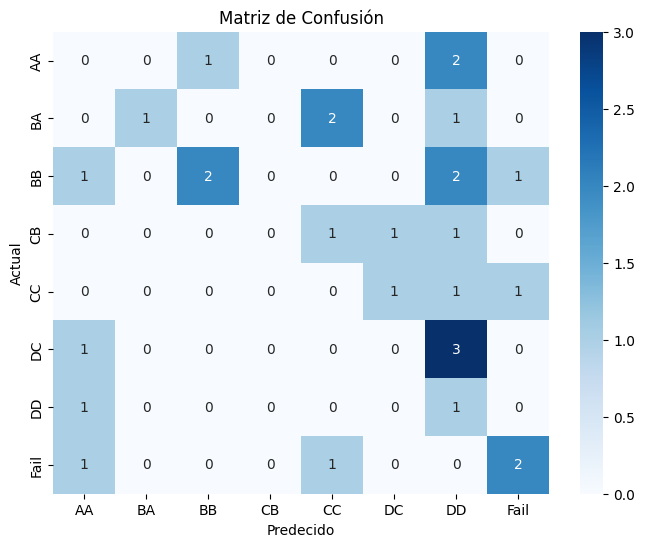

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoders['Grade'].classes_, yticklabels=label_encoders['Grade'].classes_)
plt.xlabel('Predecido')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

## Overfitting

In [48]:
test_data = pd.read_csv('student.csv')

# Codificar variables categóricas usando los LabelEncoders previamente creados
for column in categorical_columns:
	test_data[column] = label_encoders[column].transform(test_data[column])

# Definir variables predictoras (X_test) y variable objetivo (y_test)
X_test = test_data.drop(['Index', 'Id', 'Grade'], axis=1)
Y_test = test_data['Grade']

Y_pred_test = model.predict(X_test)

accuracy_test = accuracy_score(Y_test, Y_pred_test)
print("Precisión del modelo en el conjunto de prueba:", accuracy_test)

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(Y_test, Y_pred_test, zero_division = 0))

Precisión del modelo en el conjunto de prueba: 0.296551724137931

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.38      0.14      0.21        35
           1       0.50      0.25      0.33        24
           2       0.67      0.29      0.40        21
           3       0.00      0.00      0.00        10
           4       0.20      0.12      0.15        17
           5       0.18      0.15      0.17        13
           6       0.22      0.94      0.36        17
           7       0.38      0.75      0.50         8

    accuracy                           0.30       145
   macro avg       0.32      0.33      0.26       145
weighted avg       0.36      0.30      0.26       145

